In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the preprocessed data
df = pd.read_csv('preprocessed_500033.csv', index_col='Date', parse_dates=True)

In [3]:
# Prepare the data
X = df.drop(['Close Price', 'Daily_Return'], axis=1)
y = df['Close Price']

In [4]:
# 1. Correlation with target variable
correlation_with_target = X.corrwith(y).abs().sort_values(ascending=False)
print("Top 10 features by correlation with target:")
print(correlation_with_target.head(10))

Top 10 features by correlation with target:
WAP                0.999846
High Price         0.999664
Low Price          0.999381
Open Price         0.998910
Lag_1_Close        0.998886
Lag_2_Close        0.997616
middle_band        0.989952
lower_band         0.989641
upper_band         0.977133
Spread High-Low    0.565472
dtype: float64


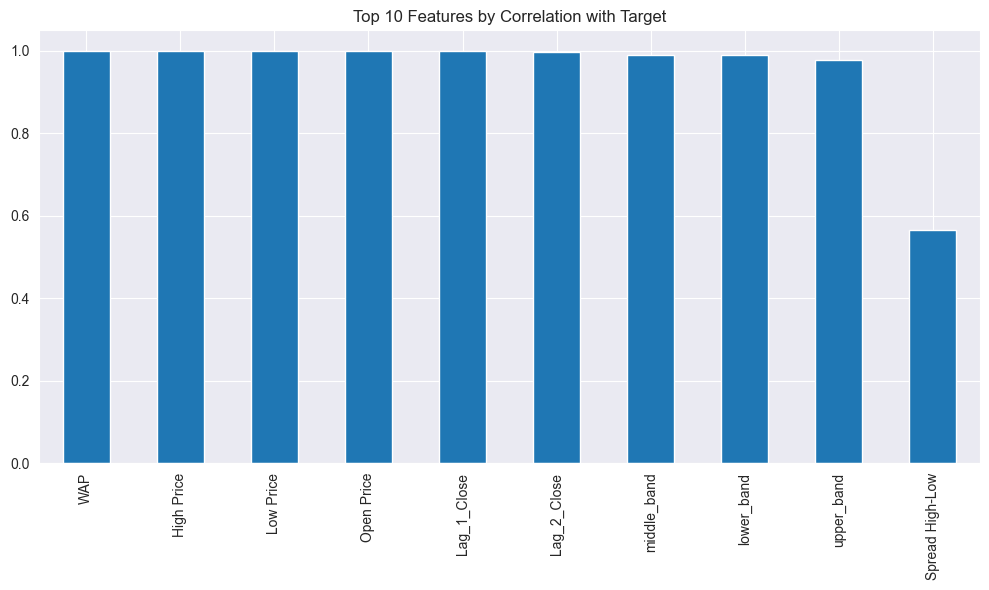

In [5]:
plt.figure(figsize=(10, 6))
correlation_with_target.head(10).plot(kind='bar')
plt.title('Top 10 Features by Correlation with Target')
plt.tight_layout()
plt.show()


Top 10 features by Mutual Information:
WAP            4.014641
Low Price      3.872784
High Price     3.656302
Open Price     3.037714
Lag_1_Close    3.002272
Lag_2_Close    2.644606
lower_band     2.217043
upper_band     2.200044
middle_band    2.188195
MACD_signal    0.774806
dtype: float64


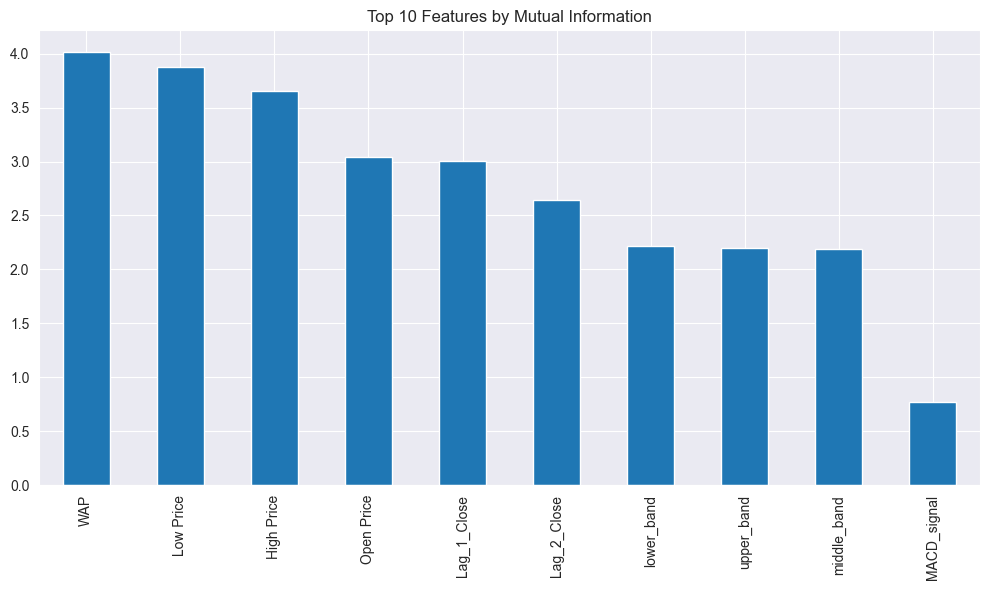

In [6]:
# 2. Mutual Information
from sklearn.feature_selection import mutual_info_regression
mi_scores = mutual_info_regression(X, y)
mi_scores = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)
print("\nTop 10 features by Mutual Information:")
print(mi_scores.head(10))

plt.figure(figsize=(10, 6))
mi_scores.head(10).plot(kind='bar')
plt.title('Top 10 Features by Mutual Information')
plt.tight_layout()
plt.show()


Top 10 features by Random Forest Importance:
WAP                  0.582901
High Price           0.388879
Low Price            0.017944
Lag_1_Close          0.008630
lower_band           0.000561
middle_band          0.000536
Open Price           0.000294
Lag_2_Close          0.000097
Spread Close-Open    0.000061
upper_band           0.000011
dtype: float64


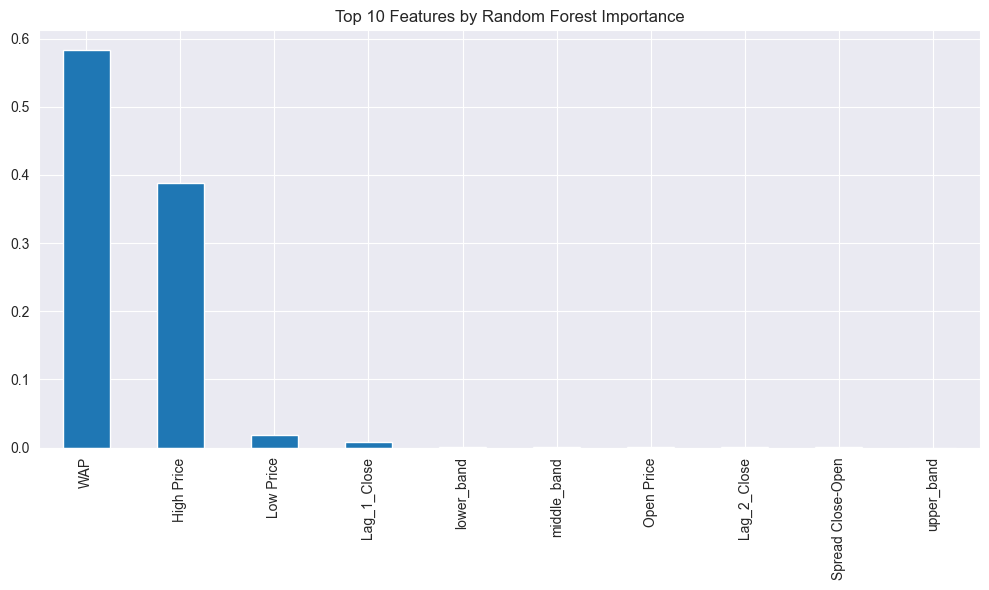

In [7]:
# 3. Random Forest Feature Importance
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)
rf_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nTop 10 features by Random Forest Importance:")
print(rf_importance.head(10))

plt.figure(figsize=(10, 6))
rf_importance.head(10).plot(kind='bar')
plt.title('Top 10 Features by Random Forest Importance')
plt.tight_layout()
plt.show()


Top 10 features by Lasso Importance:
Open Price                   1137.102740
Spread Close-Open              53.104616
High Price                      1.395881
upper_band                      1.014115
No. of Trades                   0.842901
Total Turnover (Rs.)            0.485654
Deliverable Quantity            0.318324
WAP                             0.217767
lower_band                      0.164263
% Deli. Qty to Traded Qty       0.117269
dtype: float64


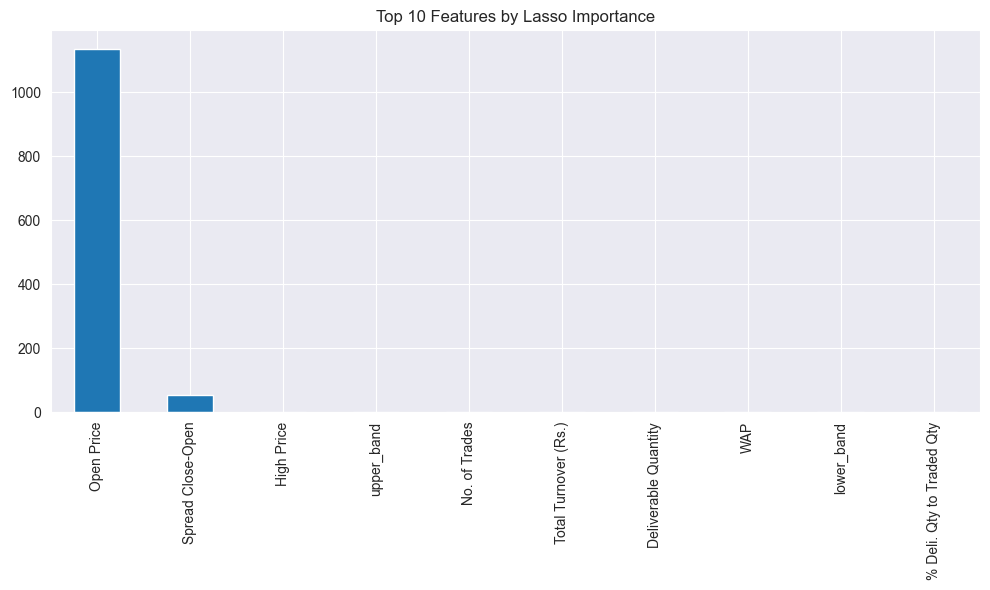

In [8]:
# 4. Lasso Feature Selection
lasso = Lasso(alpha=0.01)
lasso.fit(X, y)
lasso_importance = pd.Series(np.abs(lasso.coef_), index=X.columns).sort_values(ascending=False)
print("\nTop 10 features by Lasso Importance:")
print(lasso_importance.head(10))

plt.figure(figsize=(10, 6))
lasso_importance.head(10).plot(kind='bar')
plt.title('Top 10 Features by Lasso Importance')
plt.tight_layout()
plt.show()


Top 10 features by RFE:
Open Price              1
Lag_2_Close             1
Lag_1_Close             1
lower_band              1
middle_band             1
Deliverable Quantity    1
Spread Close-Open       1
WAP                     1
Low Price               1
High Price              1
dtype: int64


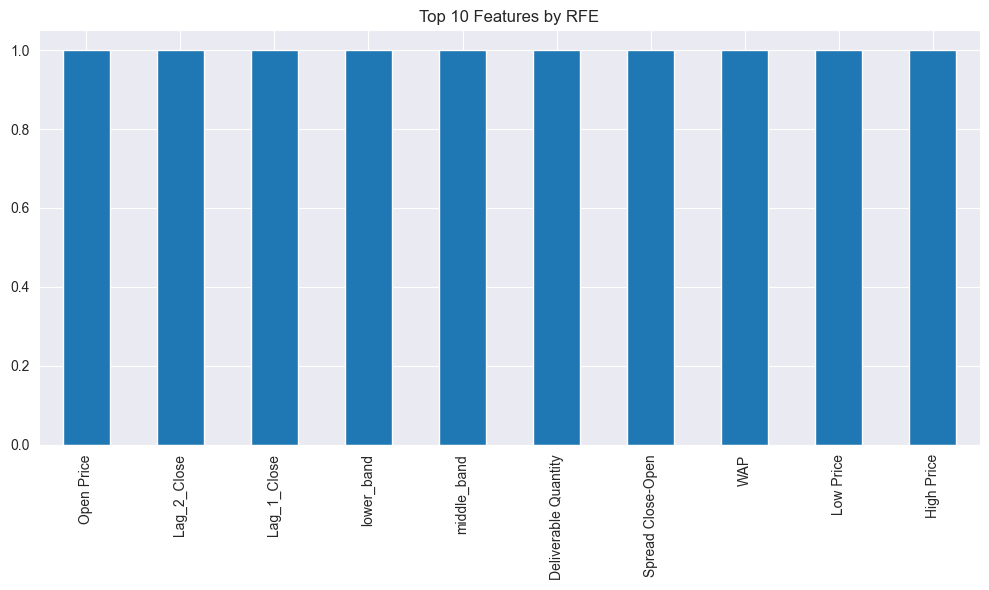

In [9]:
# 5. Recursive Feature Elimination
rfe = RFE(estimator=RandomForestRegressor(n_estimators=100, random_state=42), n_features_to_select=10)
rfe.fit(X, y)
rfe_importance = pd.Series(rfe.ranking_, index=X.columns).sort_values()
print("\nTop 10 features by RFE:")
print(rfe_importance.head(10))

plt.figure(figsize=(10, 6))
rfe_importance.head(10).plot(kind='bar')
plt.title('Top 10 Features by RFE')
plt.tight_layout()
plt.show()

In [10]:
# Combine all feature selection methods
all_methods = pd.DataFrame({
    'Correlation': correlation_with_target,
    'Mutual Information': mi_scores,
    'Random Forest': rf_importance,
    'Lasso': lasso_importance,
    'RFE': rfe_importance
})

In [11]:
# Count how many times each feature appears in the top 10 of each method
feature_counts = (all_methods.rank(ascending=False) <= 10).sum(axis=1).sort_values(ascending=False)
print("\nFeatures by appearance in top 10 across all methods:")
print(feature_counts)


Features by appearance in top 10 across all methods:
upper_band                   4
Open Price                   4
High Price                   4
lower_band                   4
WAP                          4
Lag_1_Close                  3
middle_band                  3
Lag_2_Close                  3
Low Price                    3
Total Turnover (Rs.)         2
Spread High-Low              2
Spread Close-Open            2
% Deli. Qty to Traded Qty    2
MACD_signal                  2
No. of Trades                2
No.of Shares                 1
Deliverable Quantity         1
MACD_hist                    1
MACD                         1
Lag_2_Volume                 1
Lag_1_Volume                 1
RSI                          0
dtype: int64


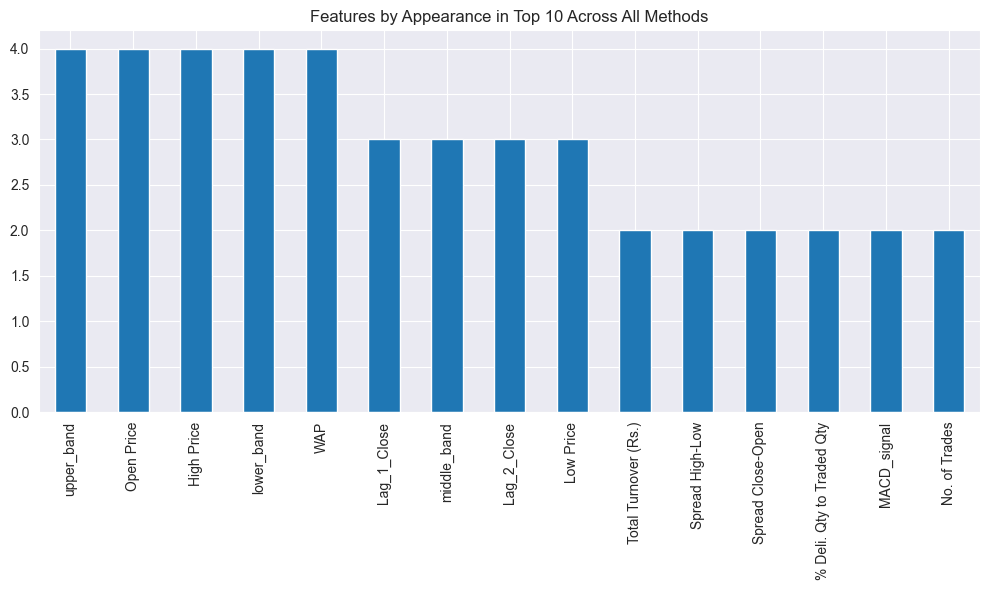

In [12]:
plt.figure(figsize=(10, 6))
feature_counts.head(15).plot(kind='bar')
plt.title('Features by Appearance in Top 10 Across All Methods')
plt.tight_layout()
plt.show()

In [13]:
# Save the final selected features
final_features = feature_counts[feature_counts >= 3].index.tolist()
print("\nFinal selected features:")
print(final_features)


Final selected features:
['upper_band', 'Open Price', 'High Price', 'lower_band', 'WAP', 'Lag_1_Close', 'middle_band', 'Lag_2_Close', 'Low Price']


In [14]:
np.savetxt('selected_features.txt', final_features, fmt='%s')
print("\nSelected features saved to selected_features.txt")


Selected features saved to selected_features.txt
